**<h4>Gaurav Jagtap</h4>**
**Data Visualization using matplotlib
Problem Statement: Analyzing Air Quality Index (AQI) Trends in a City
Dataset: "City_Air_Quality.csv"**
**Description: The dataset contains information about air quality measurements in a specific
city over a period of time. It includes attributes such as date, time, pollutant levels (e.g., PM2.5,
PM10, CO), and the Air Quality Index (AQI) values. The goal is to use the matplotlib library
to create visualizations that effectively represent the AQI trends and patterns for different
pollutants in the city.**<br><br>
**Tasks to Perform:**<br><br>
1. Import the "City_Air_Quality.csv" dataset.<br>
2. Explore the dataset to understand its structure and content.<br>
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels,
and AQI values.<br>
4. Create line plots or time series plots to visualize the overall AQI trend over time.<br>
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to
visualize their trends over time.<br>
6. Use bar plots or stacked bar plots to compare the AQI values across different dates or
time periods.<br>
7. Create box plots or violin plots to analyze the distribution of AQI values for different
pollutant categories.<br>
8. Use scatter plots or bubble charts to explore the relationship between AQI values and
pollutant levels.<br>
9. Customize the visualizations by adding labels, titles, legends, and appropriate color
schemes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('City_Air_Quality.csv' ,sep=';') 

In [3]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [5]:
#Dropping CO(GT) and Unnamed columns
df.drop(['CO(GT)','Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [6]:
#Formatting some object columns from strings to floats

df.replace(to_replace=',',value='.',regex=True,inplace=True) 

for i in 'C6H6(GT) T RH AH'.split():
    df[i] = pd.to_numeric(df[i],errors='coerce') 

In [7]:
#Replacing null data from -200 to NaN for posterior treatment

df.replace(to_replace=-200,value=np.nan,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   PT08.S1(CO)    8991 non-null   float64
 3   NMHC(GT)       914 non-null    float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.0+ MB


In [8]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True) 

df['Time'] = pd.to_datetime(df['Time'],format= '%H.%M.%S' ).dt.time
df.head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [9]:
NMHC_ratio = df['NMHC(GT)'].isna().sum()/len(df['NMHC(GT)'])

print('The NMHC(GT) sensor has {:.2f}% of missing data.'.format(NMHC_ratio*100))

The NMHC(GT) sensor has 90.35% of missing data.


In [10]:
#Removing NMHC(GT) sensor due to amount of null values

df.drop('NMHC(GT)', axis=1, inplace=True) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   PT08.S1(CO)    8991 non-null   float64       
 3   C6H6(GT)       8991 non-null   float64       
 4   PT08.S2(NMHC)  8991 non-null   float64       
 5   NOx(GT)        7718 non-null   float64       
 6   PT08.S3(NOx)   8991 non-null   float64       
 7   NO2(GT)        7715 non-null   float64       
 8   PT08.S4(NO2)   8991 non-null   float64       
 9   PT08.S5(O3)    8991 non-null   float64       
 10  T              8991 non-null   float64       
 11  RH             8991 non-null   float64       
 12  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 962.0+ KB


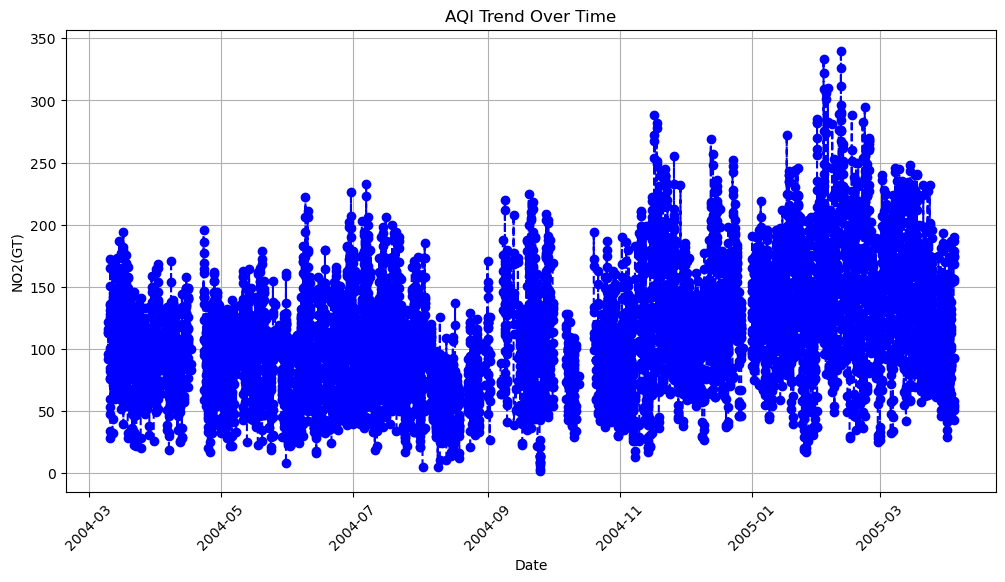

In [11]:
# Task 4: Visualize the overall AQI trend over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['NO2(GT)'], marker='o', linestyle='--', color='b')
plt.title('AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('NO2(GT)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

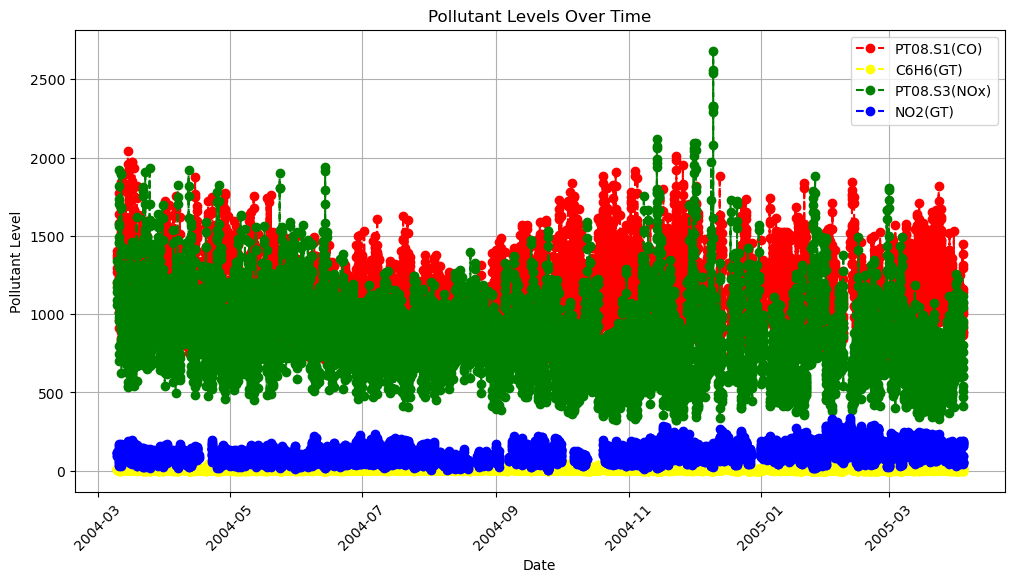

In [12]:
# Task 5: Visualize trends of individual pollutant levels over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['PT08.S1(CO)'], label='PT08.S1(CO)', marker='o', linestyle='--', color='r')
plt.plot(df['Date'], df['C6H6(GT)'], label='C6H6(GT)', marker='o', linestyle='--', color='yellow')
#plt.plot(df['Date'], df['NMHC(GT)'], label='NMHC(GT)', marker='o', linestyle='--', color='yellow')
plt.plot(df['Date'], df['PT08.S3(NOx)'], label='PT08.S3(NOx)', marker='o', linestyle='--', color='g')

plt.plot(df['Date'], df['NO2(GT)'], label='NO2(GT)', marker='o', linestyle='--', color='b')
plt.title('Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['NO2(GT)'], color='skyblue')
plt.title('AQI Comparison Across Dates')
plt.xlabel('Date')
plt.ylabel('NO2(GT)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Task 7: Analyze the distribution of AQI values for different pollutant categories using box plots
plt.figure(figsize=(8, 6))
df[['PT08.S4(NO2)', 'PT08.S5(O3)', 'PT08.S1(CO)']].boxplot()
plt.title('Distribution of AQI Values for Different Pollutant Categories')
plt.ylabel('AQI Value')
plt.show()

In [ ]:
# Task 8: Explore the relationship between AQI values and pollutant levels using scatter plots
plt.figure(figsize=(8, 6))
plt.scatter(df['PT08.S4(NO2)'], df['AH'], color='r', label='PT08.S4(NO2)')
plt.scatter(df['PT08.S5(O3)'], df['AH'], color='g', label='PT08.S5(O3)')
plt.scatter(df['PT08.S1(CO)'], df['AH'], color='b', label='PT08.S1(CO)')
plt.title('Relationship between AQI Values and Pollutant Levels')
plt.xlabel('Pollutant Level')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()